# Quickstart

Once installation is complete you can start running Sarkas. This quickstart guide will walk you through
a simple example in order to check that everything is running smoothly.

---
## Simulation

In Jupyter notebook you can run the following commands

In [1]:
# Import the usual libraries
%pylab
%matplotlib inline
import os

plt.style.use('MSUstyle')

# Import sarkas
from sarkas.processes import Simulation, PostProcess

# Create the file path to the YAML input file
example_directory = os.path.join('..',
                                 os.path.join('sarkas','examples'))

input_file_name = os.path.join(example_directory, 'yocp_cgs_pp.yaml')

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


You can find this notebook in the directory `sarkas/notebooks` that was download with the repository.
This example notebook will run a short simulation using the `yocp_cgs_pp.yaml` input file found in the examples directory in `sarkas`.

The above commands imported the required libraries and define the file path to our input file. 

Let's now run the simulation

In [2]:
# Initialize the Simulation class
sim = Simulation(input_file_name)
# Setup the simulation's parameters
sim.setup(read_yaml=True)
# Run the simulation
sim.run()







________             ______                
__  ___/_____ __________  /_______ ________
_____ \_  __ `/_  ___/_  //_/  __ `/_  ___/
____/ // /_/ /_  /   _  ,<  / /_/ /_(__  ) 
/____/ \__,_/ /_/    /_/|_| \__,_/ /____/  
                                           


An open-source pure-python molecular dynamics code for non-ideal plasmas.



======================= Simulation ==========================

Job ID:  yocp_cgs_pp
Job directory:  Simulations/yocp_cgs_pp
Equilibration dumps directory:  Simulations/yocp_cgs_pp/Equilibration/dumps
Production dumps directory:  Simulations/yocp_cgs_pp/Production/dumps

Units:  cgs
Total No. of particles =  1000

Particle Species:
No. of species =  1
Species 1 : C
	Species ID: 0
	No. of particles = 1000 
	Number density = 1.136669e+23 [N/cc]
	Mass = 2.008900e-23 [g]
	Charge = 9.494010e-10 [esu]
	Temperature = 5.453880e+03 [K]

Lengths scales:
Wigner-Seitz radius = 1.280636e-08 [cm]
No. of non-zero box dimensions =  3
Box length along x axis = 



Equilibration Time: 0 hrs 0 min 28 sec

------------- Production -------------




Production Time: 0 hrs 3 min 0 sec

Total Time: 0 hrs 3 min 28 sec


## Postprocessing

Now that our simulation is complete we need to check if the simulation was physically sound. The first thing to do is to inizialize the `PostProcess` class with the input file name.

In [3]:
# Initialize the Postprocessing class
postproc = PostProcess(input_file_name)
postproc.setup(read_yaml=True)

Next we want to check that the system equilibrated correctly. We do this by calling the `Thermodynamics` class and plot the temperature and energy as a function of time. You should get a plot like this

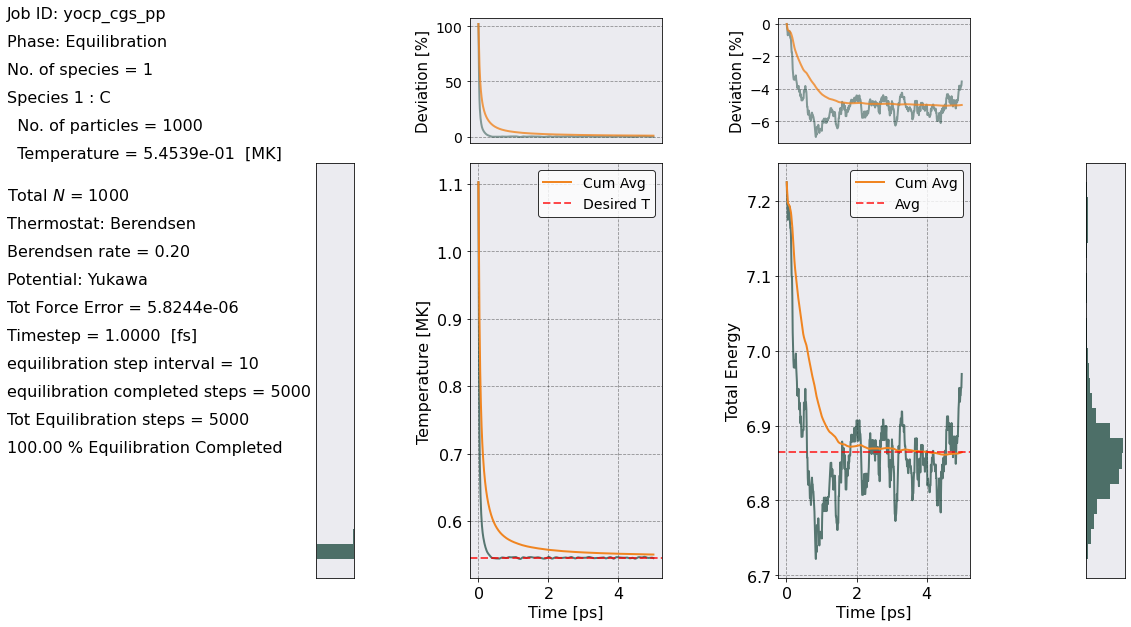

In [4]:
postproc.therm.setup(postproc.parameters)
postproc.therm.temp_energy_plot(postproc, phase='equilibration')

The important thing to check is that the temperature has relaxed to the desired value, _i.e._ the red dashed line.


Next we look at the energy and temperature of the production phase. This is done by the same command as above but changing the `phase` option to `production`. You should get a plot like this

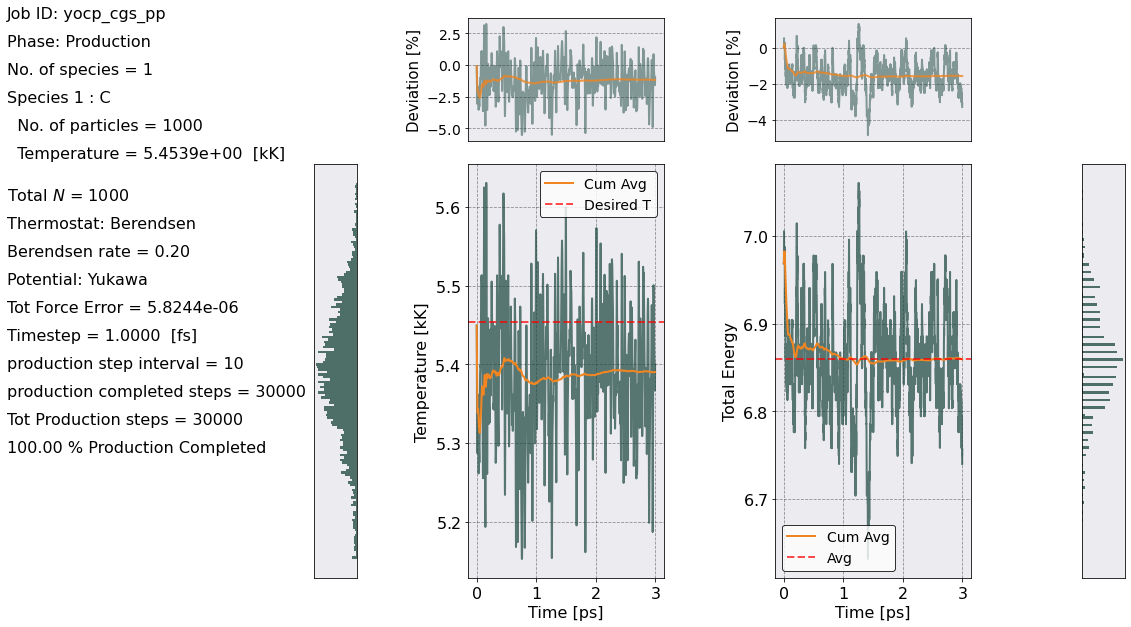

In [5]:
postproc.therm.temp_energy_plot(postproc, phase='production')

You will notice that both the energy and temperature oscillates wildly. This is fine as long as the percentage deviations, in the top plots, are small. You should have a temperature deviations between -2% to ~ 4-5% while energy deviations between -2% and 1%.

---
### Observables

Let's calculate some physical quantities. The most common observable is the radial distribution function. This is calculated by calling the `RadialDistributionFunction` class within the postprocess. 
The radial distribution function is partially calculated during the production phase, hence, after initializing the class we will call the `save` function to complete the calculation. Finally we plot it and you should obtain a similar plot

<AxesSubplot:xlabel='$r/a_{\\rm ws}$'>

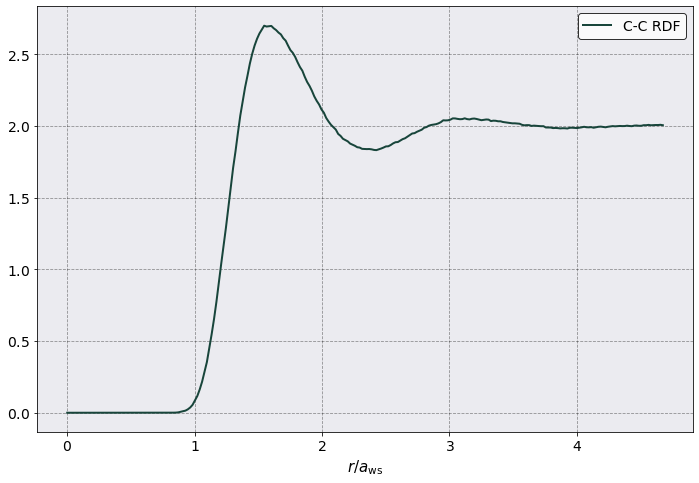

In [6]:
# Initialize the Pair Distribution Function class
postproc.rdf.setup(postproc.parameters)
postproc.rdf.compute()
postproc.rdf.plot(normalization=postproc.parameters.a_ws, xlabel = r'$r/a_{\rm ws}$')

Things to check in here are: 

* Does $g(r)$ go to 1 for large $r$ values ?
* Is there a peak at $r \sim ~1.5 a$ ?
* Is the height of this peak about ~ 1.4?

If the answer to all these question is yes than the simulation was successfull.